https://miykael.github.io/blog/2022/advanced_eda/

In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn import tree, svm

import warnings
warnings.filterwarnings('ignore')
plt.style.use("ggplot")

In [125]:
train = pd.read_csv("train.csv")
train.tail()

,Unnamed: 0,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
795,272,male,0,standard,completed,74,71,65
796,853,male,2,standard,completed,72,72,72
797,894,male,3,standard,none,86,77,78
798,179,male,0,standard,completed,89,87,86
799,182,female,4,standard,none,84,95,89


In [76]:
for i in train.columns[1:]:
    print(train[i].unique())

['female' 'male']
[1 4 2 0 3 5]
['standard' 'free/reduced']
['none' 'completed']
[ 62  79  77  45  82  32  53  57  67  74  63  49  89  66  78  72  76  97
 100  75  65  60  83  43  88  71  80  54  48  70  84  55  59  61  69  92
  56  68  81  85  41  87  47  58  28  39  95  38  51  40  98  73  94  29
  36  64  23  52  90  37  86  50  30  46  91  93  96  42  99  33  44  35
  26  25  34  31  13]
[ 76  57  86  46  83  41  70  47  65  71  73  37  84  64  78  66  80  88
  36 100  50  61  95  68  85  87  77  82  62  72  79  43  54  90  48  97
  93  58  60  55  59  53  74  52  81  75  49  44  32  56  63  42  94  92
  67  38  69  27  89  33  51  34  91  98  39  96  45  40  31  99  28  35
  29]
[ 67  58  84  49  85  39  65  42  54  70  66  41  81  74  73  68  88  87
  32  79  83  76 100  45  82  93  63  78  60  95  62  56  71  77  53  51
  36  97  59  57  47  50  80  72  64  89  31  48  52  86  61  69  90  92
  27  94  75  44  43  55  35  26  33  40  98  99  96  30  28  34  38  24
  91  46  37  2

In [4]:
train = train.rename(columns={"Unnamed: 0": "id"})

In [83]:
pd.DataFrame({"Null values": np.sum(train.isnull()), "Null percentages":\
              (np.sum(train.isnull())/len(train)) * 100})

,Null values,Null percentages
id,0,0.0
gender,0,0.0
parental level of education,0,0.0
lunch,0,0.0
test preparation course,0,0.0
math score,0,0.0
reading score,0,0.0
writing score,0,0.0
gender_Code,0,0.0


In [6]:
train_copy = train.copy()
train_copy.head()

,id,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,764,female,1,standard,none,62,76,67
1,866,male,4,standard,none,79,57,58
2,208,female,2,standard,none,77,86,84
3,337,female,0,free/reduced,none,45,46,49
4,323,male,3,standard,completed,82,83,85


In [7]:
test = pd.read_csv("test.csv")
test = test.rename(columns={"Unnamed: 0": "id"})
test.head()

,id,gender,lunch,test preparation course,math score,reading score,writing score
0,79,male,standard,none,54,43,45
1,277,female,standard,none,72,77,77
2,855,female,standard,none,87,97,100
3,922,male,standard,none,55,55,55
4,332,male,standard,none,56,54,43


In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,800.0,499.91000,288.798100,0.0,243.25,500.5,748.25,999.0
parental level of education,800.0,2.03500,1.520416,0.0,1.00,2.0,3.00,5.0
math score,800.0,66.57375,15.708055,13.0,56.00,67.0,78.00,100.0
reading score,800.0,69.13500,14.820977,27.0,60.00,70.0,79.00,100.0
writing score,800.0,67.83375,15.738432,23.0,58.00,68.0,79.00,100.0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           800 non-null    int64 
 1   gender                       800 non-null    object
 2   parental level of education  800 non-null    int64 
 3   lunch                        800 non-null    object
 4   test preparation course      800 non-null    object
 5   math score                   800 non-null    int64 
 6   reading score                800 non-null    int64 
 7   writing score                800 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 50.1+ KB


In [10]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,200.0,497.860,289.623808,12.0,262.75,480.5,751.5,992.0
math score,200.0,65.685,14.130966,13.0,55.75,66.0,77.0,100.0
reading score,200.0,68.470,14.421825,36.0,59.00,68.5,79.0,100.0
writing score,200.0,67.355,15.070987,31.0,57.75,66.5,78.0,100.0


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       200 non-null    int64 
 1   gender                   200 non-null    object
 2   lunch                    200 non-null    object
 3   test preparation course  200 non-null    object
 4   math score               200 non-null    int64 
 5   reading score            200 non-null    int64 
 6   writing score            200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


In [12]:
train_copy["gender"] = train_copy["gender"].replace("female", 0)
train_copy["gender"] = train_copy["gender"].replace("male", 1)
train_copy["lunch"] = train_copy["lunch"].replace("free/reduced", 0)
train_copy["lunch"] = train_copy["lunch"].replace("standard", 1)
train_copy["test preparation course"] = train_copy["test preparation course"].replace("none", 0)
train_copy["test preparation course"] = train_copy["test preparation course"].replace("completed", 1)
train_copy.head()

,id,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,764,0,1,1,0,62,76,67
1,866,1,4,1,0,79,57,58
2,208,0,2,1,0,77,86,84
3,337,0,0,0,0,45,46,49
4,323,1,3,1,1,82,83,85


##### Exploratory Data Analysis

We have "gender", "lunch" and "test preparation course" as binary variables. 

In [13]:
def var_boxplot(var):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))
    train.boxplot(column=["math score"], by=var, ax=ax1)
    train.boxplot(column=["reading score"], by=var, ax=ax2)
    train.boxplot(column=["writing score"], by=var, ax=ax3)

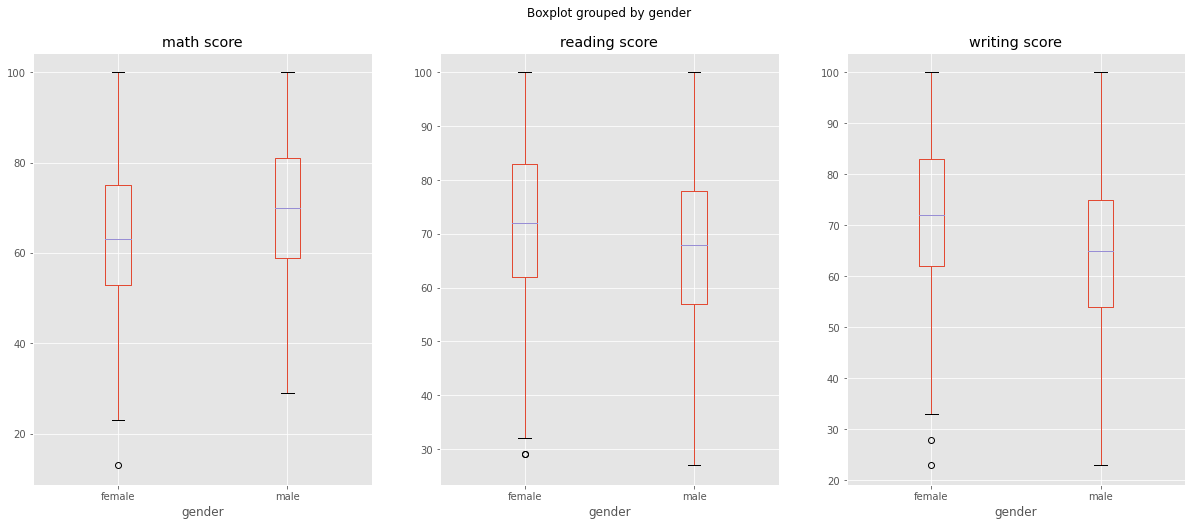

In [14]:
var_boxplot("gender")

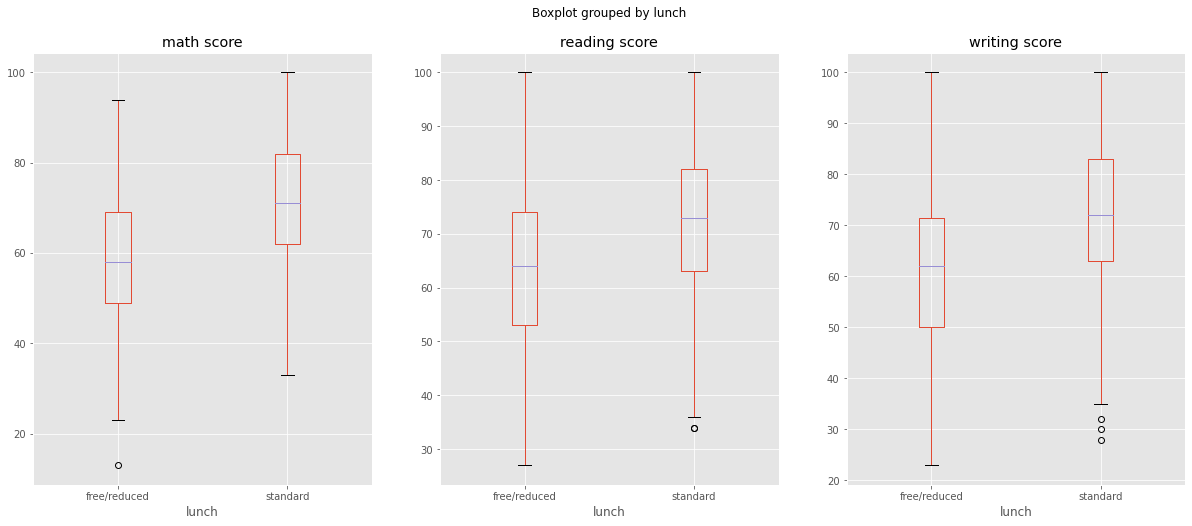

In [15]:
var_boxplot("lunch")

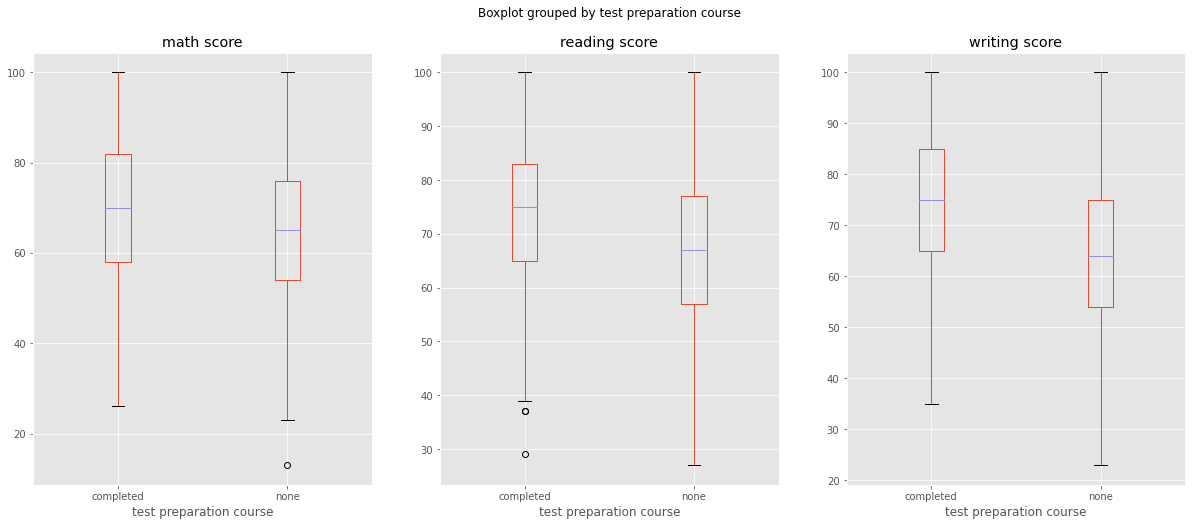

In [16]:
var_boxplot("test preparation course")

In [17]:
train["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

In [18]:
def correlation_mat(x):
    methods = ["pearson", "spearman", "kendall"]
    palette = ["magma", "viridis", "cubehelix"]
    fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
    for i in range(3):
        sns.heatmap(x.corr(method=methods[i]), ax=axes[i], vmax=.8, square=True, annot=True, linewidths=.5, cmap=palette[i])
        axes[i].set_title(methods[i] + " correlation")

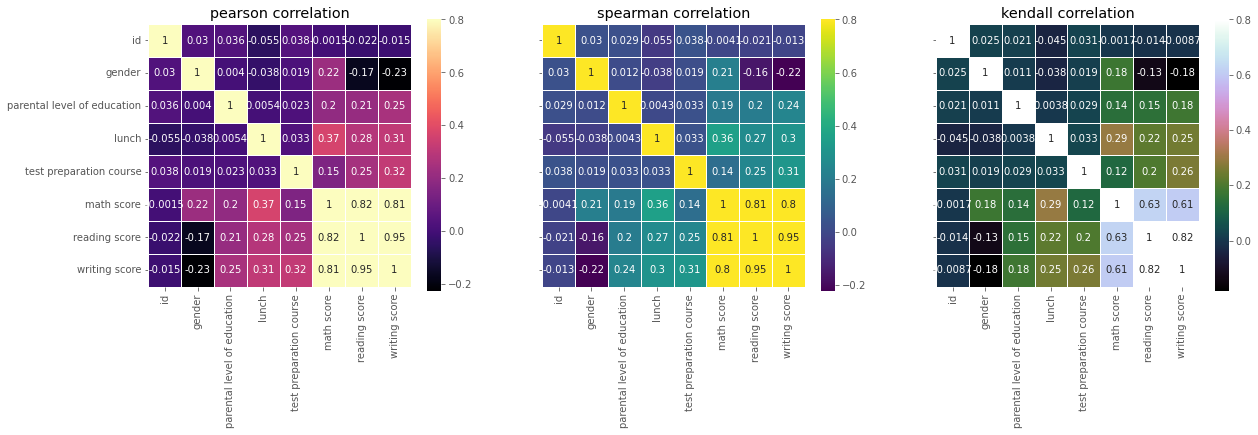

In [19]:
correlation_mat(train_copy)

In [84]:
def var_boxplot_2(var):
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle("parental level of education")
    for i in range(2):
        for j in range(3):
            sns.boxplot(ax=axes[i, j], data=train, x="parental level of education", y=var)

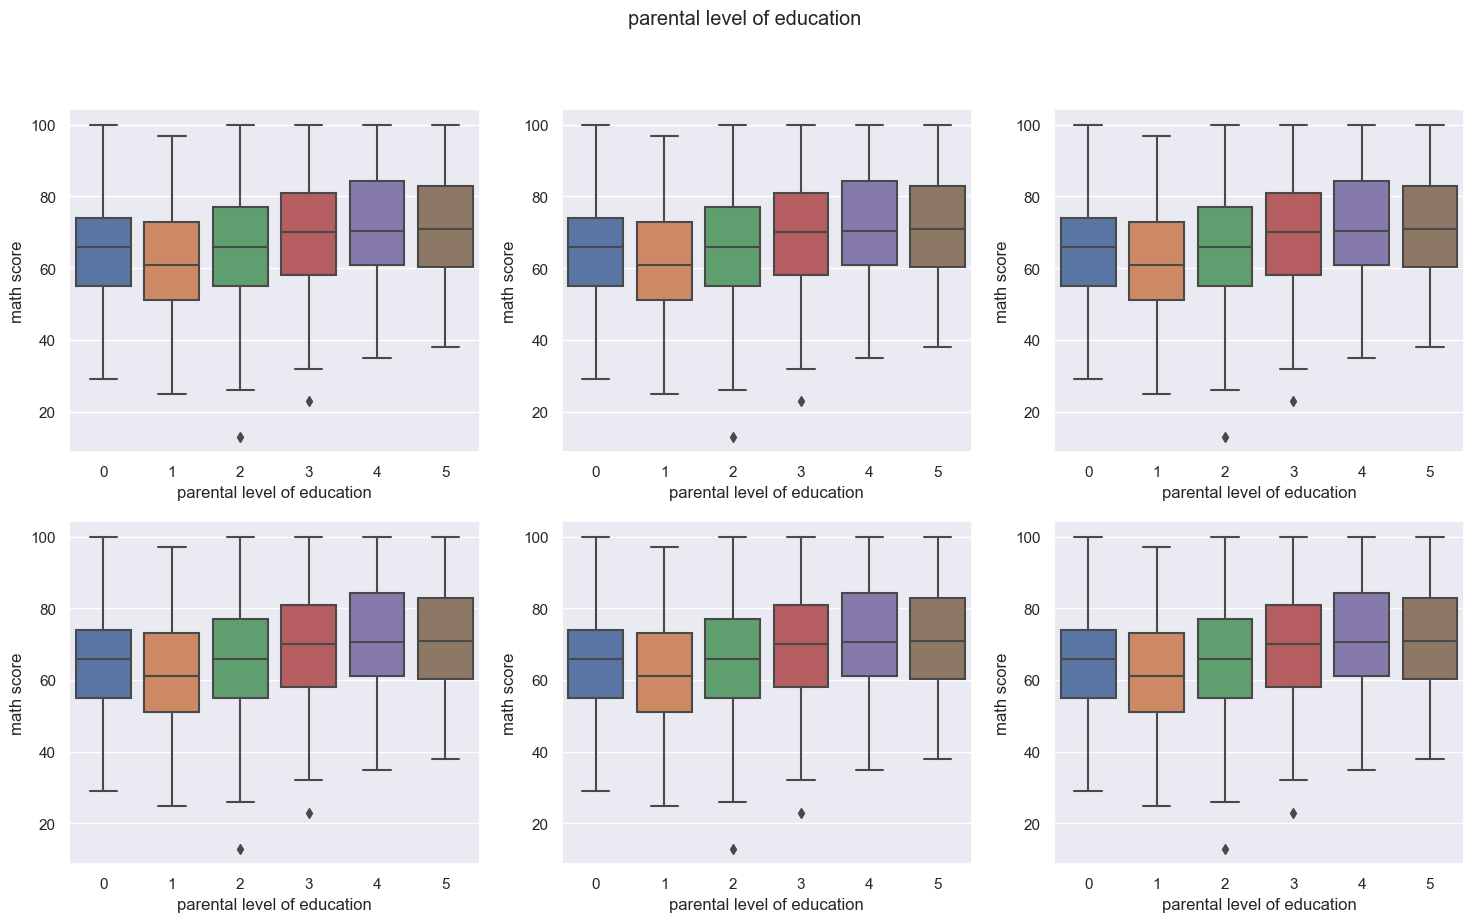

In [86]:
var_boxplot_2("math score")

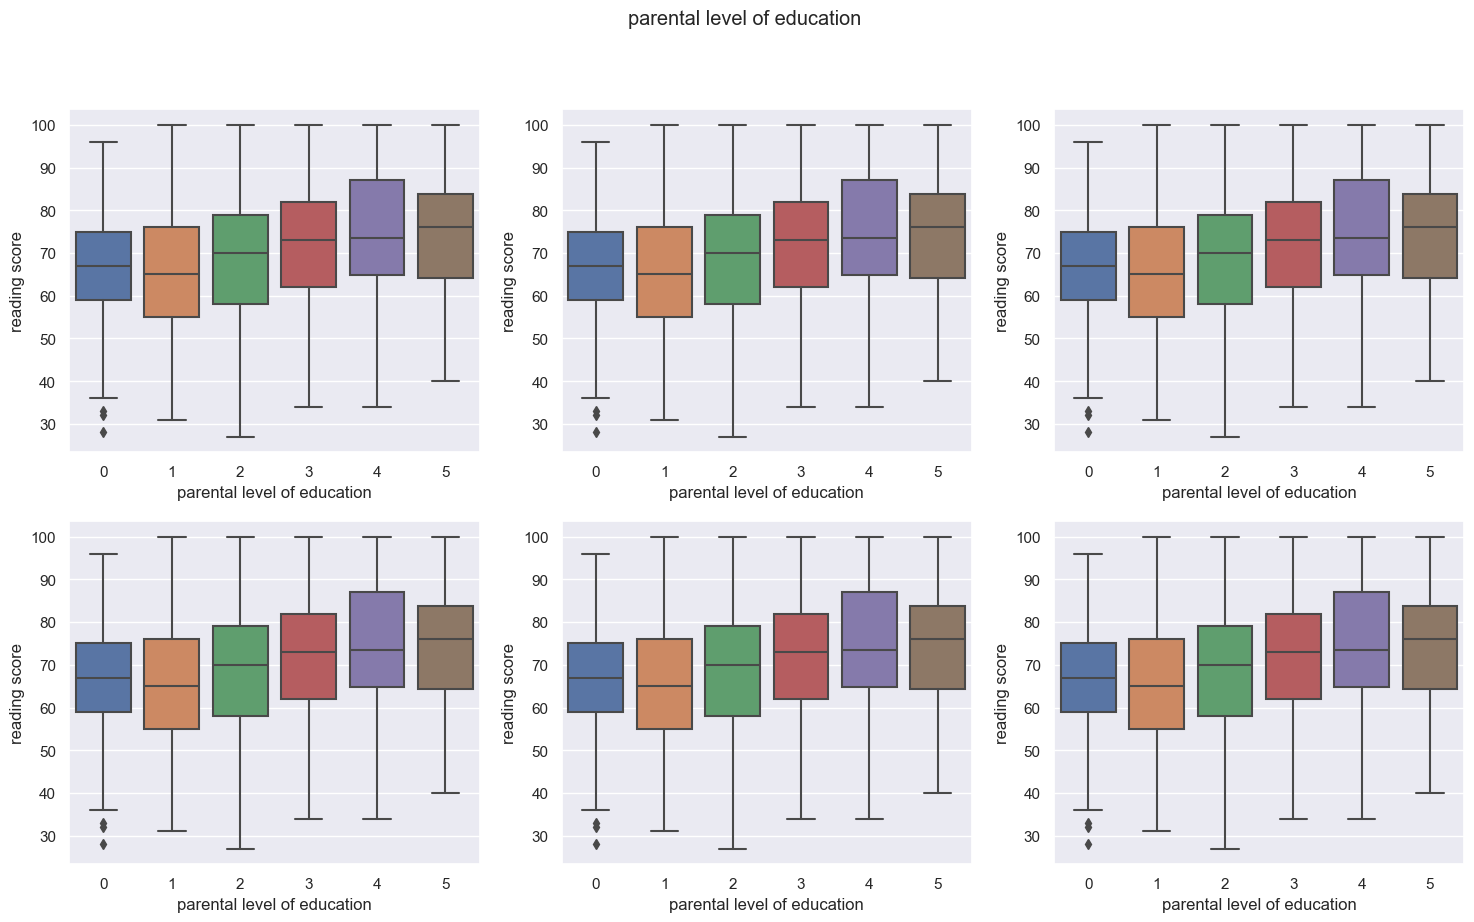

In [87]:
var_boxplot_2("reading score")

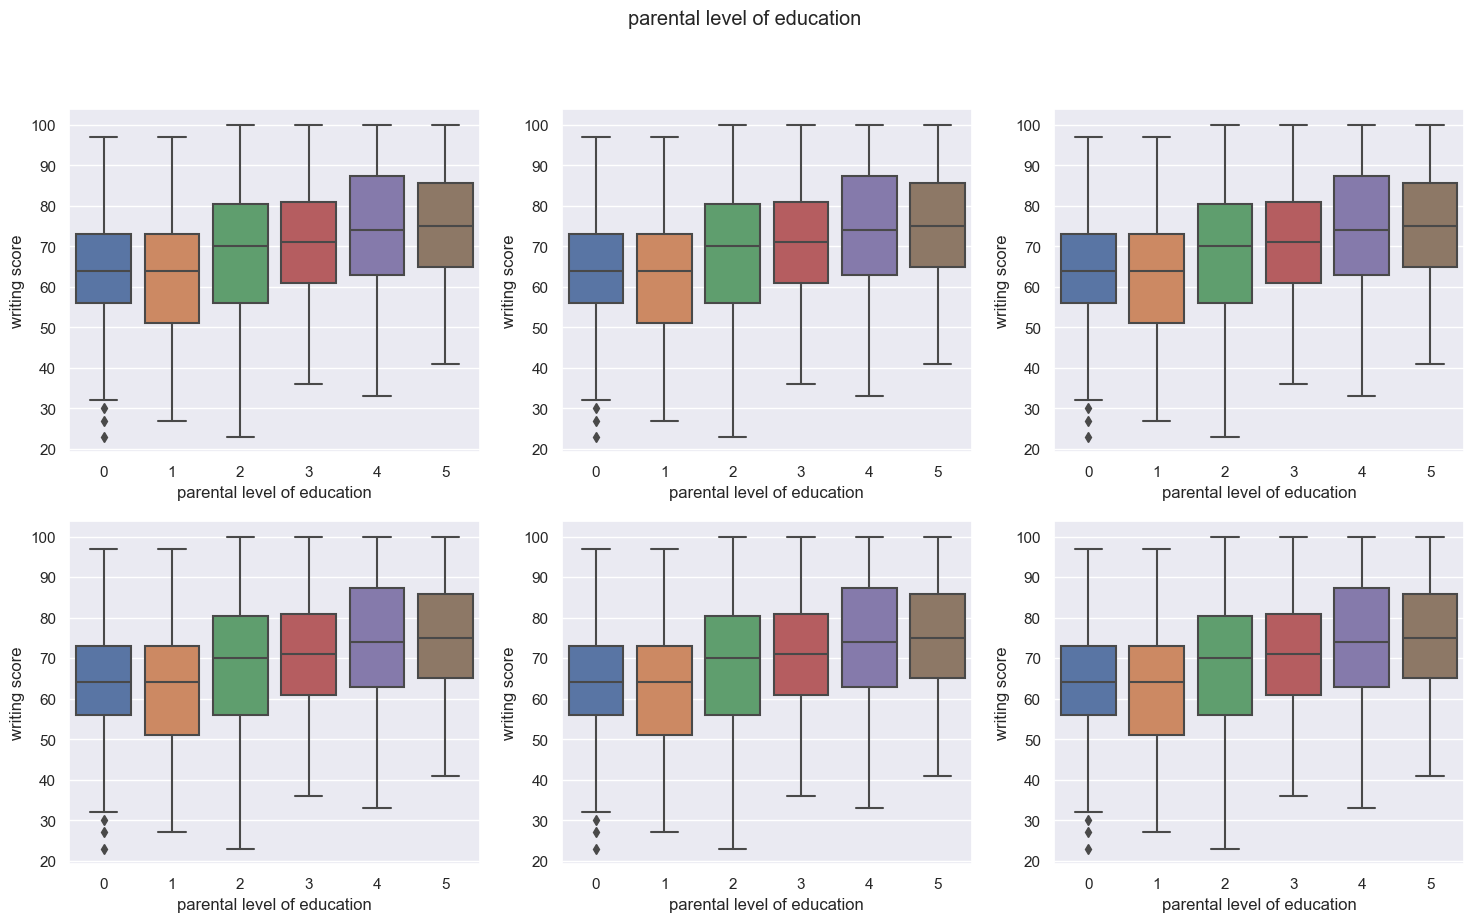

In [88]:
var_boxplot_2("writing score")

<AxesSubplot:xlabel='math score', ylabel='Density'>

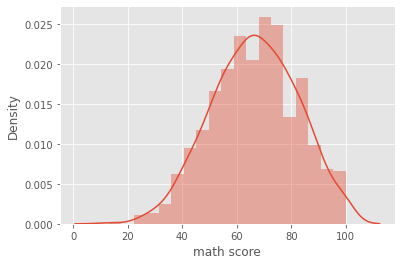

In [24]:
sns.distplot(train["math score"])

<AxesSubplot:xlabel='math score'>

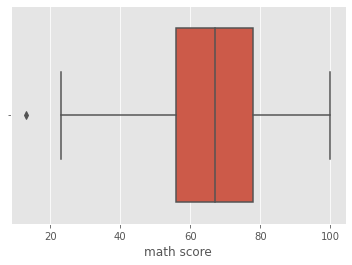

In [25]:
sns.boxplot(train["math score"])

<AxesSubplot:xlabel='gender', ylabel='count'>

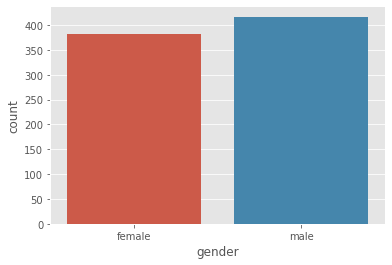

In [26]:
sns.countplot(train["gender"])

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'parental level of education'}>],
       [<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>, <AxesSubplot:>]],
      dtype=object)

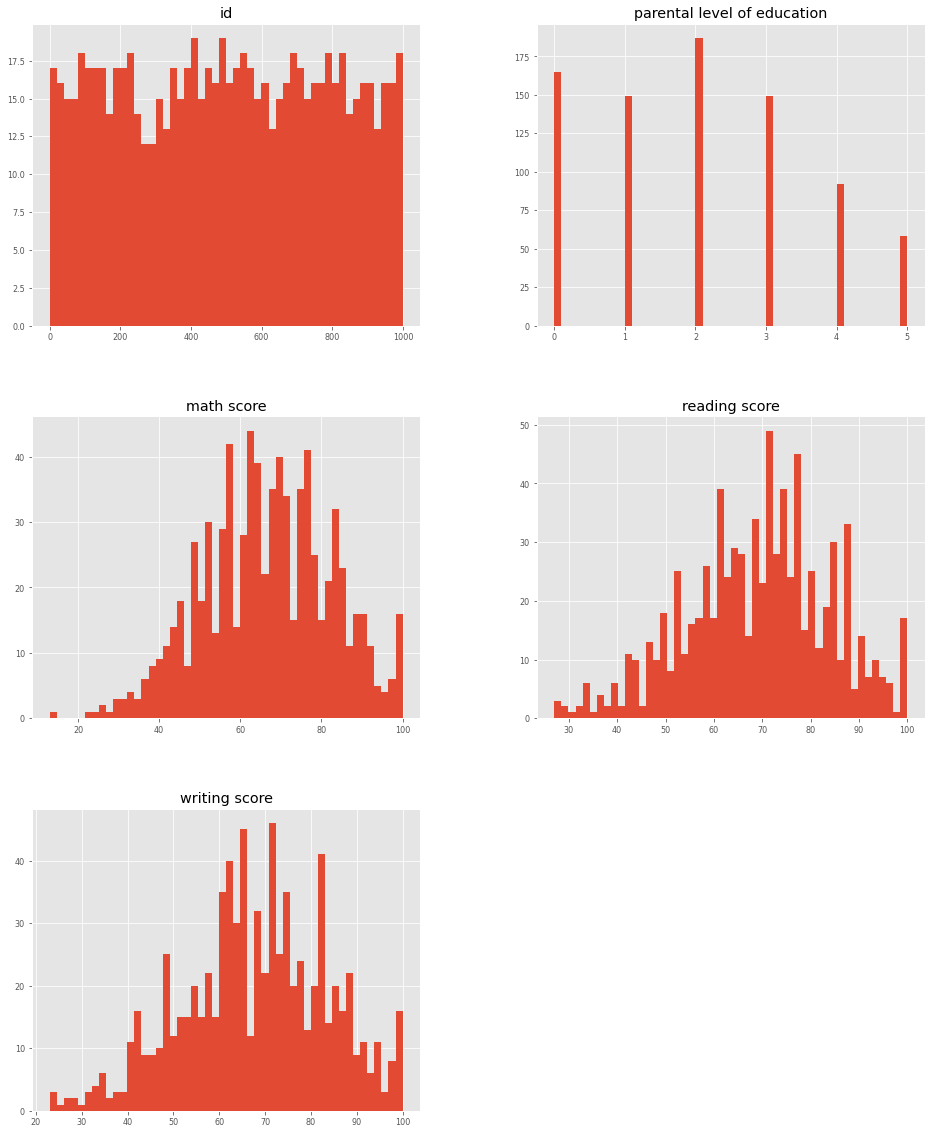

In [27]:
train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

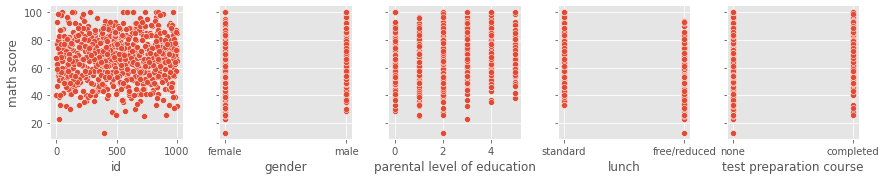

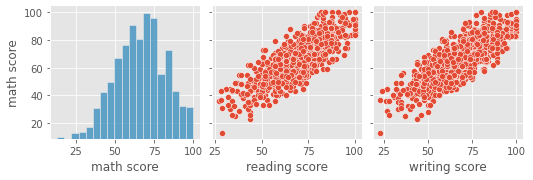

In [28]:
for i in range(0, len(train.columns), 5):
    sns.pairplot(data=train,
                x_vars=train.columns[i:i+5],
                y_vars=["math score"])

In [29]:
train.head()

,id,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,764,female,1,standard,none,62,76,67
1,866,male,4,standard,none,79,57,58
2,208,female,2,standard,none,77,86,84
3,337,female,0,free/reduced,none,45,46,49
4,323,male,3,standard,completed,82,83,85


In [30]:
train_copy["writing_score_Mean"] = train_copy.groupby(["parental level of education", "gender"])["writing score"]\
                                     .transform(lambda x: round(x.mean(), 2))

train_copy.tail()

,id,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,writing_score_Mean
795,272,1,0,1,1,74,71,65,60.48
796,853,1,2,1,1,72,72,72,62.85
797,894,1,3,1,0,86,77,78,68.20
798,179,1,0,1,1,89,87,86,60.48
799,182,0,4,1,0,84,95,89,77.67


In [31]:
np.sort(train_copy.groupby(["parental level of education", "gender"])["writing score"]\
.transform(lambda x: round(x.mean(), 2)).unique())

array([59.83, 60.48, 62.85, 65.49, 68.2 , 68.3 , 69.6 , 71.69, 72.95,
       73.64, 77.67, 79.15])

In [32]:
# Extract with lambda the first characters
train["gender_Code"] = train["gender"].apply(lambda x: x[0:2])
train[["gender", "gender_Code"]].head()

,gender,gender_Code
0,female,fe
1,male,ma
2,female,fe
3,female,fe
4,male,ma


In [33]:
pd.DataFrame(train["parental level of education"].value_counts())

,parental level of education
2,187
0,165
1,149
3,149
4,92
5,58


In [34]:
pd.DataFrame(train.groupby(["parental level of education"])["test preparation course"].value_counts())

test preparation course
parental level of education test preparation course                         
0                           none                                         118
                            completed                                     47
1                           none                                          98
                            completed                                     51
2                           none                                         116
                            completed                                     71
3                           none                                          90
                            completed                                     59
4                           none                                          60
                            completed                                     32
5                           none                                          43
                            completed                                     15

In [35]:
round(train.groupby(["gender","parental level of education"])[["math score", "reading score", "writing score" ]].mean(), 2)

math score  reading score  writing score
gender parental level of education                                          
female 0                                 61.39          69.23          68.30
       1                                 57.25          66.55          65.49
       2                                 62.74          72.54          72.95
       3                                 66.00          73.75          73.64
       4                                 67.47          76.84          77.67
       5                                 70.24          78.15          79.15
male   0                                 67.43          64.45          60.48
       1                                 66.45          62.66          59.83
       2                                 68.13          65.36          62.85
       3                                 72.58          69.73          68.20
       4                                 76.20          72.06          71.69
       5                                 73.00          70.80          69.60

In [36]:
pd.DataFrame(train.groupby("gender").size())

,0
gender,
female,383
male,417


In [91]:
round(train.groupby("gender")["math score"].agg(
    mean="mean",
    median="median",
    standard_deviation="std"
), 2)

,mean,median,standard_deviation
gender,,,
female,62.99,63.0,15.46
male,69.87,70.0,15.22


In [38]:
# This is what you do to pass your own custom functions

def transformed_mean(value):
    value *= 100
    value_mean = value.mean()
    return round(value_mean, 2)

In [39]:
# df_g = train.groupby("gender").agg(transformed_mean)
train.groupby("gender")["math score", "reading score", "writing score"].agg(transformed_mean)
# df_g.columns = ["math score", "reading score", "writing score"]

,math score,reading score,writing score
gender,,,
female,6298.69,7172.85,7155.87
male,6986.81,6675.30,6441.25


In [40]:
# Do not use groupby with categorical variables, use pd.cut instead

groups = pd.cut(train["math score"], bins=3)
train.groupby(groups)["math score"].agg(count="count")

,count
math score,
"(12.913, 42.0]",53
"(42.0, 71.0]",440
"(71.0, 100.0]",307


In [41]:
pd.value_counts(train.dtypes)# Count data types

int64     5
object    4
dtype: int64

In [42]:
train.select_dtypes(exclude="number").head() # Exclude non-numerical features

,gender,lunch,test preparation course,gender_Code
0,female,standard,none,fe
1,male,standard,none,ma
2,female,standard,none,fe
3,female,free/reduced,none,fe
4,male,standard,completed,ma


In [43]:
train.describe(exclude="number") # You can also apply it to describe

,gender,lunch,test preparation course,gender_Code
count,800,800,800,800
unique,2,2,2,2
top,male,standard,none,ma
freq,417,509,525,417


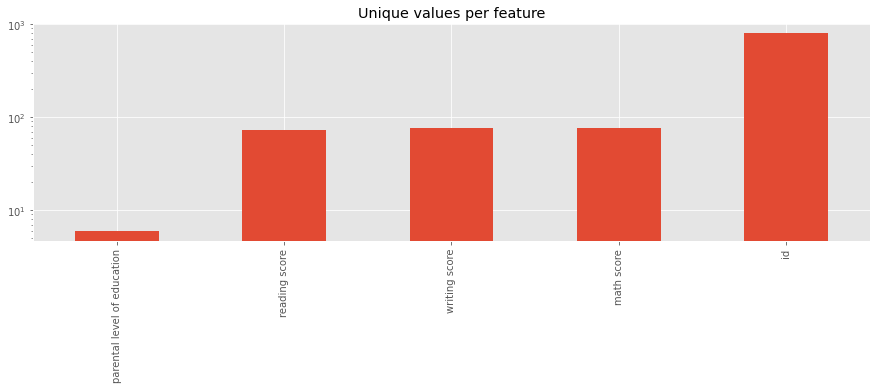

In [44]:
# For each numerical feature compute number of unique entries
unique_values = train.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

In [45]:
train.loc[lambda train: train["math score"] == 42.0]

,id,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_Code
307,58,female,2,free/reduced,none,42,61,51,fe
561,795,female,5,free/reduced,none,42,50,44,fe
565,598,male,1,free/reduced,none,42,40,40,ma


In [46]:
train.iloc[6:12,2:]

,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_Code
6,1,free/reduced,completed,53,70,65,fe
7,2,free/reduced,none,57,47,42,ma
8,0,free/reduced,none,67,65,54,ma
9,1,standard,none,74,71,70,ma
10,0,standard,none,63,73,66,fe
11,3,free/reduced,completed,49,37,41,ma


In [47]:
##### Our first goal in any EDA is to assess the quality of the dataset and its features.

In [48]:
#### Finding duplicates it's important specially when working with ids

n_duplicates = train_copy.drop(labels=["id"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 2 duplicates in your database.


In [49]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           800 non-null    int64  
 1   gender                       800 non-null    int64  
 2   parental level of education  800 non-null    int64  
 3   lunch                        800 non-null    int64  
 4   test preparation course      800 non-null    int64  
 5   math score                   800 non-null    int64  
 6   reading score                800 non-null    int64  
 7   writing score                800 non-null    int64  
 8   writing_score_Mean           800 non-null    float64
dtypes: float64(1), int64(8)
memory usage: 56.4 KB


In [50]:
# This is how you handle duplicates
columns_to_consider = train_copy.drop(labels=["id"], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
train_copy = train_copy.drop_duplicates(subset=columns_to_consider)
train_copy.shape

(798, 9)

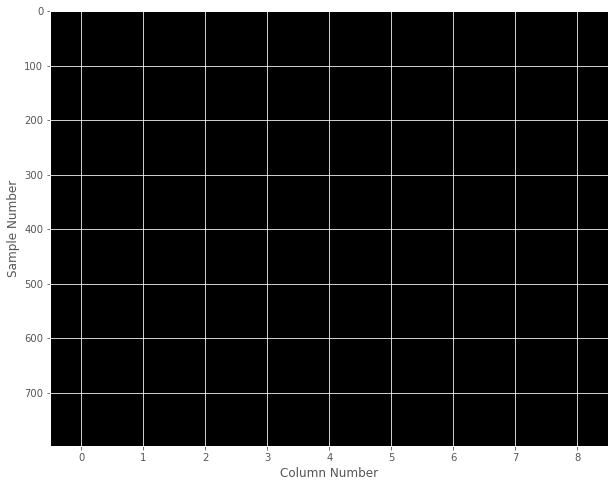

In [51]:
#### Looking further at  the nans 

plt.figure(figsize=(10, 8))
plt.imshow(train_copy.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

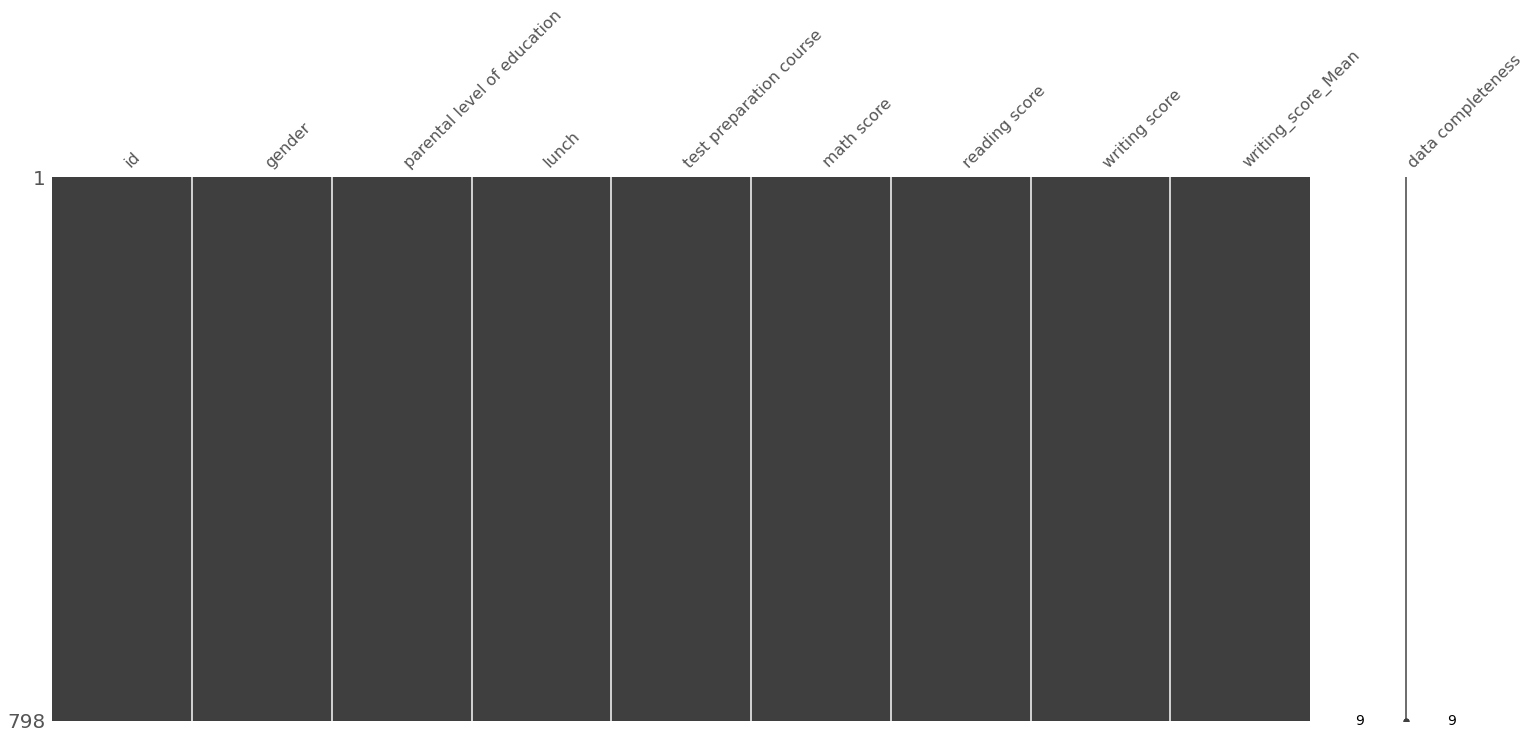

In [52]:
import missingno as msno

msno.matrix(train_copy, labels=True, sort="descending");

In [53]:
# Therefore, let’s go ahead and drop samples that have more than 20% of missing values.
# The threshold is inspired by the information from the ‘Data Completeness’ column on 
# the right of this figure.

train_copy = train_copy.dropna(thresh=train_copy.shape[1] * 0.80, axis=0).reset_index(drop=True)
train_copy.shape

(798, 9)

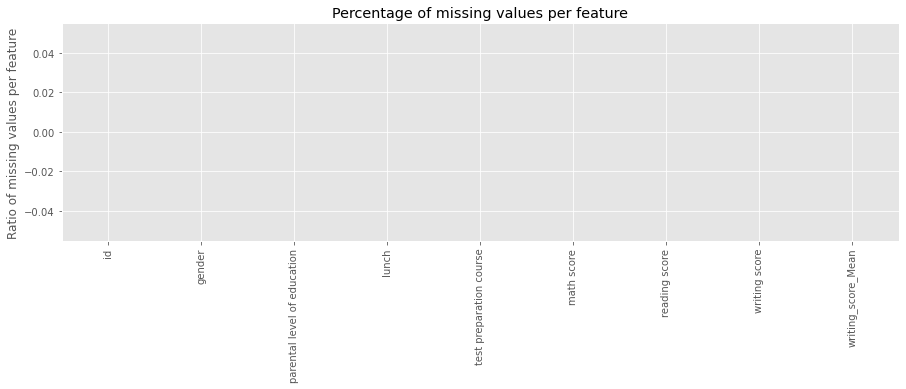

In [54]:
train_copy.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [55]:
# Remove any feature with more than 15% missing values

train_copy = train_copy.dropna(thresh=train_copy.shape[0] * 0.85, axis=1)
train_copy.shape

(798, 9)

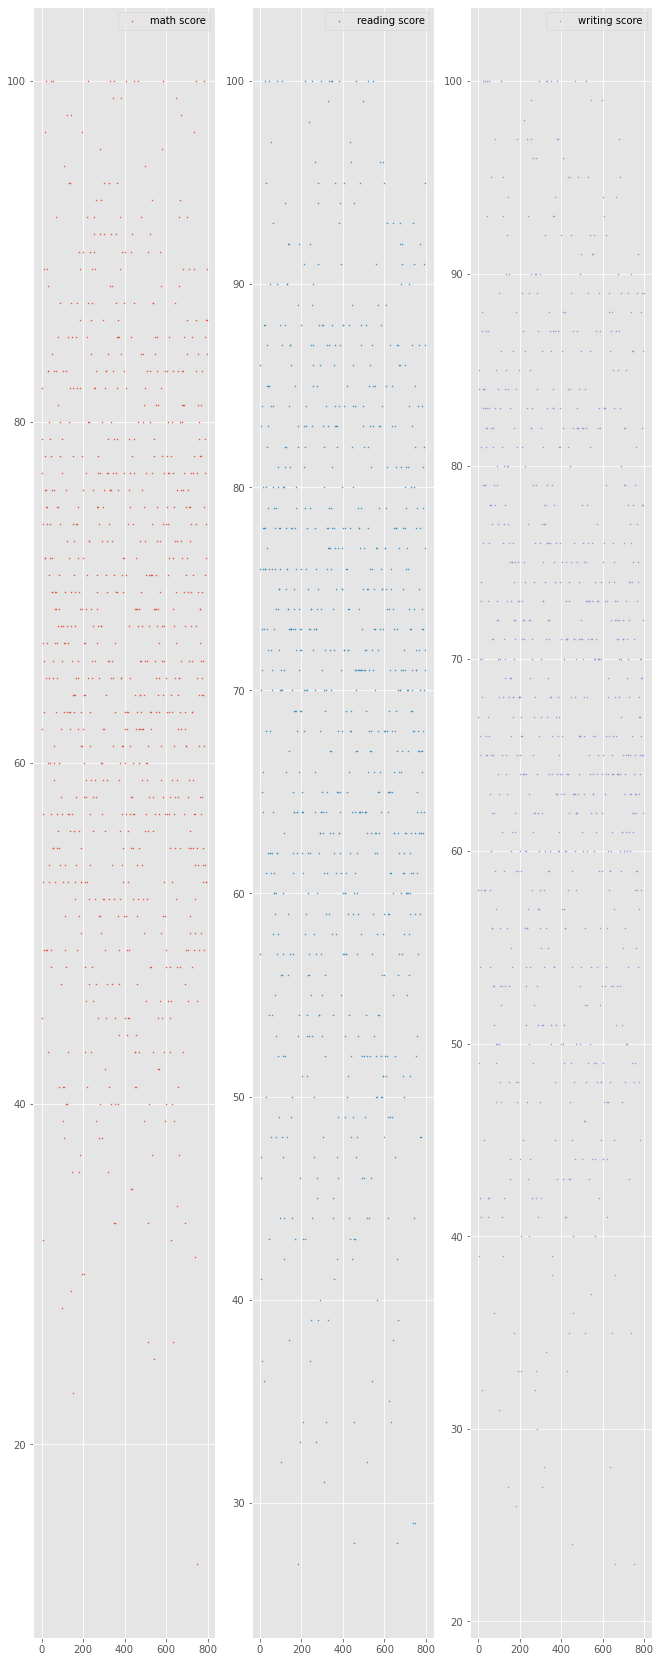

In [56]:
num_columns = ["math score", "reading score", "writing score"]
train_copy[num_columns].plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

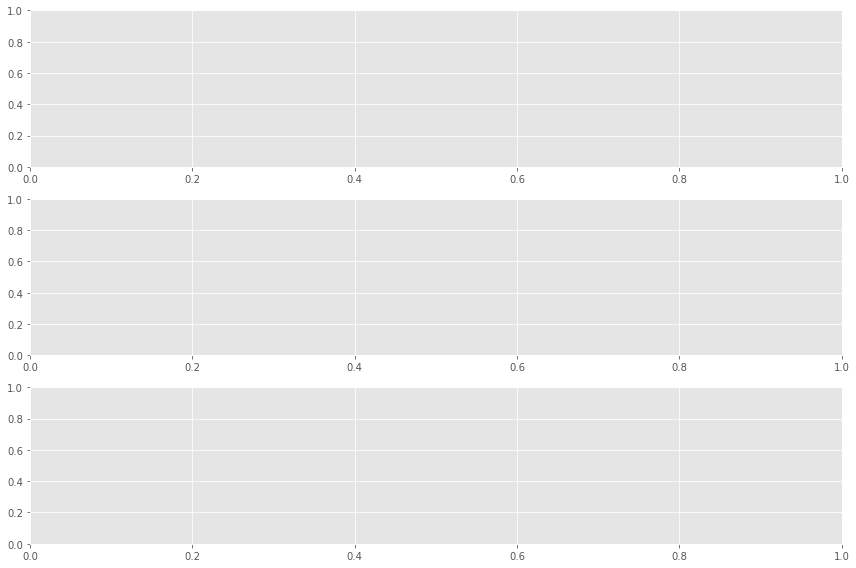

In [57]:
#### for categorical data

fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 8))

# Identify non-numerical features
df_non_numerical = train_copy.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();

In [58]:
# Collect entry values of the 10 most frequent accidents
accident_ids = df_non_numerical["gender"].value_counts().head(10).index

# Removes accidents from the 'accident_ids' list
train_copy_2 = train_copy[~train_copy["gender"].isin(accident_ids)]
train_copy_2.shape

KeyError: 'gender'

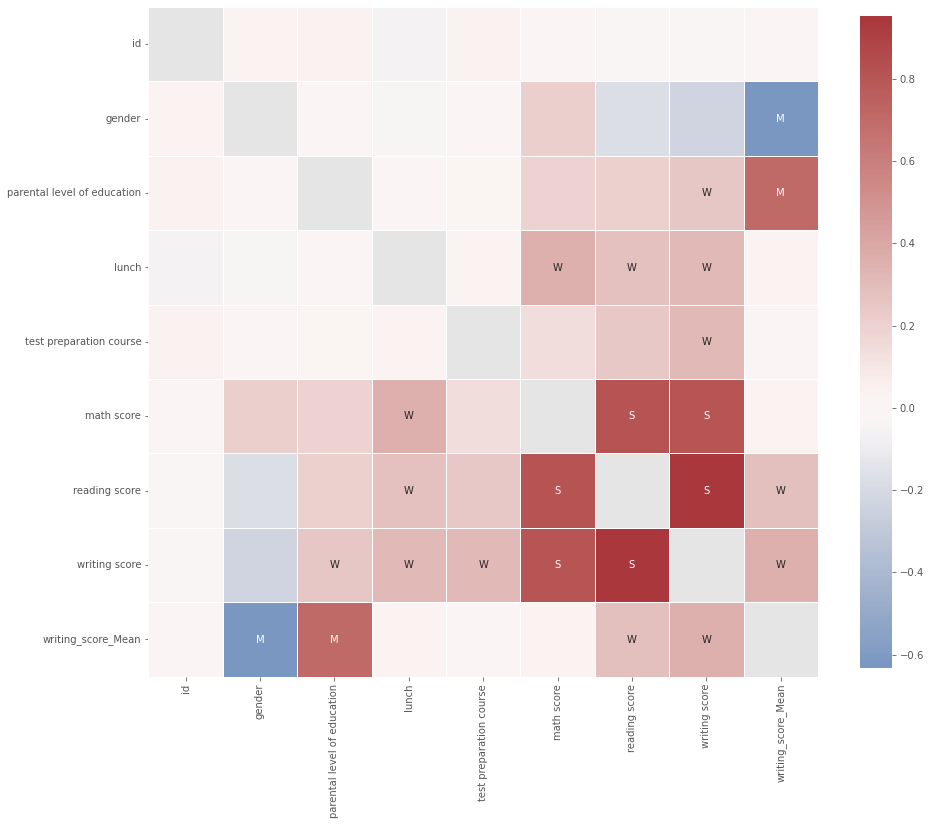

In [59]:
# Another way to correlate data

train_corr = train_copy.corr(method="pearson")

labels = np.where(np.abs(train_corr)>0.75, "S",
                  np.where(np.abs(train_corr)>0.5, "M",
                           np.where(np.abs(train_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(train_corr, mask=np.eye(len(train_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [60]:
# Ordering the correlations
lower_triangle_mask = np.tril(np.ones(train_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = train_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)

writing_score_Mean           gender                        -0.632907
writing score                gender                        -0.231405
reading score                gender                        -0.172289
lunch                        id                            -0.053960
                             gender                        -0.039945
reading score                id                            -0.019970
writing score                id                            -0.012609
math score                   id                             0.001280
parental level of education  gender                         0.002439
lunch                        parental level of education    0.004248
writing_score_Mean           test preparation course        0.004714
                             id                             0.005403
test preparation course      gender                         0.016000
                             parental level of education    0.021028
                             lunch

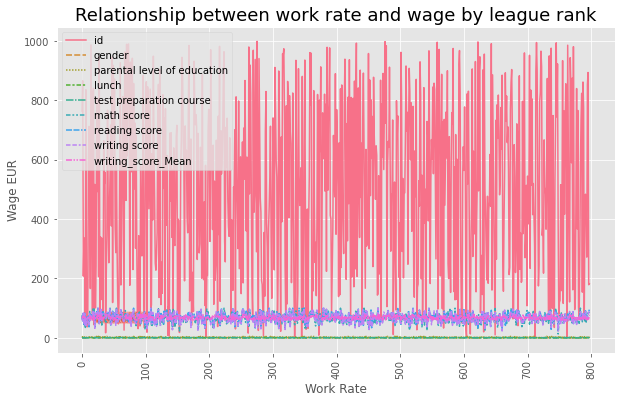

In [61]:
plt.figure(figsize=(10, 6))#Scatter plot
ax = sns.scatterplot(x ='writing score',
                    y = train_copy['writing_score_Mean'],
#                     hue = "league_rank",
                    data = train_copy,
                     palette = ["green", "red", "coral", "blue"],
                     legend="full",
                     alpha = 0.4
                    )
#Getting the max wage for each work rate
max_wage_eur = train_copy.groupby("gender")["writing_score_Mean"].max() #Making a line plot of max wages
sns.lineplot(data = train_copy,
            ax = ax.axes,
            color="grey")

ax.tick_params(axis= "x", rotation=90)
plt.xlabel("Work Rate")
plt.ylabel("Wage EUR")
plt.title("Relationship between work rate and wage by league rank", fontsize = 18)
plt.show()

##### dtale, pandas profiling, sweetviz and autoviz

In [62]:
# !pip install pandas_profiling

In [63]:
# We declare the function (to reuse it)
def profile_dataframe(dataframe):
    # We import the library
    from pandas_profiling import ProfileReport
    # We generate the dataframe report
    profile = ProfileReport(dataframe)
    # We export to HTML
    profile.to_file(outputfile="df_profiling_report.html")
    return

# We launch the function, adding the dataframe as an input parameter
profile_dataframe(train_copy)

TypeError: to_file() got an unexpected keyword argument 'outputfile'

In [ ]:
# !pip install dtale

import dtale

d = dtale.show(train_copy)
d.open_browser()

import pandas_profiling
pandas_profiling.ProfileReport(train_copy)

In [67]:
# !pip install sweetviz

import sweetviz

my_report  = sweetviz.analyze([train,'Train'], target_feat='math score')
my_report.show_html('FinalReport.html')

!pip install autoviz

from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz('sample.csv')

##### Algorithm

bayesian ridge
lasso
ridge
elasticnet
linear
decisiontreeregressor
randomforestregressor
knnregressor
svr
gradientboostingregressor

In [64]:
train_reg = train.copy()
train_reg.head()

,id,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_Code
0,764,female,1,standard,none,62,76,67,fe
1,866,male,4,standard,none,79,57,58,ma
2,208,female,2,standard,none,77,86,84,fe
3,337,female,0,free/reduced,none,45,46,49,fe
4,323,male,3,standard,completed,82,83,85,ma


In [70]:
gender_Type_Dumm = pd.get_dummies(data=train_reg["gender"], columns=[], drop_first=True)

pd.concat([train_reg["gender"], gender_Type_Dumm], axis=1).head()
train_reg

,id,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_Code
0,764,female,1,standard,none,62,76,67,fe
1,866,male,4,standard,none,79,57,58,ma
2,208,female,2,standard,none,77,86,84,fe
3,337,female,0,free/reduced,none,45,46,49,fe
4,323,male,3,standard,completed,82,83,85,ma
...,...,...,...,...,...,...,...,...,...
795,272,male,0,standard,completed,74,71,65,ma
796,853,male,2,standard,completed,72,72,72,ma
797,894,male,3,standard,none,86,77,78,ma
798,179,male,0,standard,completed,89,87,86,ma


<AxesSubplot:ylabel='Density'>

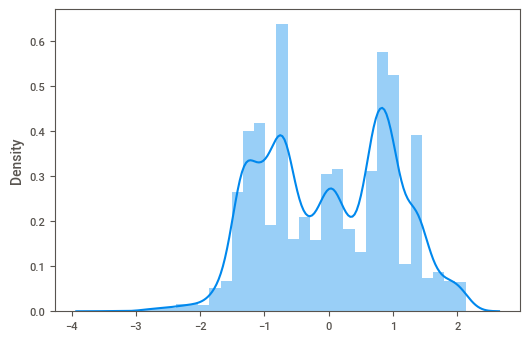

In [71]:
train_arr = train_copy.values
train_arr = np.asarray(train_arr)

# Finding normalised array of X_Train
x_std=StandardScaler().fit_transform(train_arr)
sns.distplot(x_std)

Text(0, 0.5, 'Cumulative explained variance')

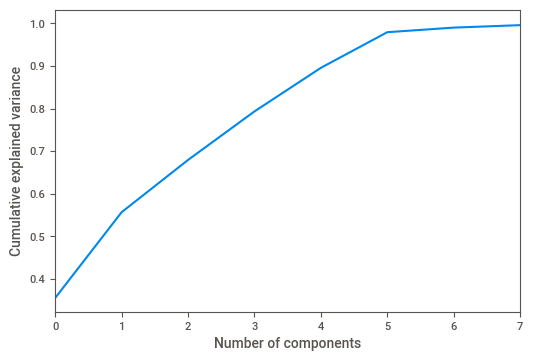

In [72]:
pca = PCA().fit(x_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0, 7, 1)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

5 Components explain almost 100% of the variance.

(-2.0, 2.0)

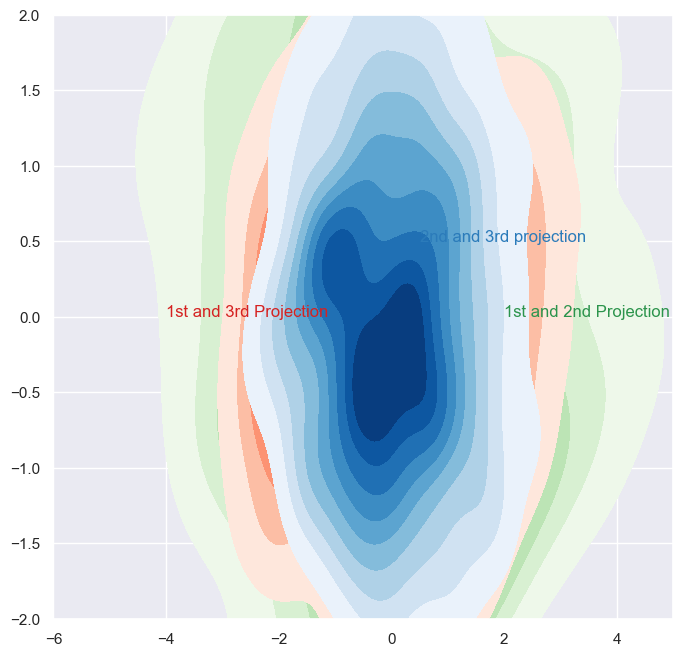

In [73]:
pca = PCA(n_components=5)
train_arr=pca.fit_transform(x_std)

sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(8, 8))

ax = sns.kdeplot(train_arr[:,0], train_arr[:,1], cmap="Greens",
                shade=True, shade_lowest=False)
ax = sns.kdeplot(train_arr[:,1], train_arr[:,2], cmap="Reds",
                shade=True, shade_lowest=False)
ax = sns.kdeplot(train_arr[:,2], train_arr[:,3], cmap="Blues",
                shade=True, shade_lowest=False)
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(0.5, 0.5, "2nd and 3rd projection", size=12, color=blue)
ax.text(-4, 0.0, "1st and 3rd Projection", size=12, color=red)
ax.text(2, 0, "1st and 2nd Projection", size=12, color=green)
plt.xlim(-6,5)
plt.ylim(-2,2)

##### Create mean punctuation

In [133]:
train["mean_score"] = round(train[["math score", "reading score", "writing score"]].mean(axis=1), 2)
# df[['Monday', 'Tuesday']].mean(axis=1)
train.head()

,Unnamed: 0,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_score
0,764,female,1,standard,none,62,76,67,68.33
1,866,male,4,standard,none,79,57,58,64.67
2,208,female,2,standard,none,77,86,84,82.33
3,337,female,0,free/reduced,none,45,46,49,46.67
4,323,male,3,standard,completed,82,83,85,83.33


In [117]:
test.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,male,standard,none,54,43,45
1,female,standard,none,72,77,77
2,female,standard,none,87,97,100
3,male,standard,none,55,55,55
4,male,standard,none,56,54,43


In [120]:
pd.get_dummies(train["gender"], prefix="gender")
train.head()

,Unnamed: 0,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,764,female,1,standard,none,62,76,67
1,866,male,4,standard,none,79,57,58
2,208,female,2,standard,none,77,86,84
3,337,female,0,free/reduced,none,45,46,49
4,323,male,3,standard,completed,82,83,85


In [126]:
one_hot = pd.get_dummies(train["gender"], prefix="gender")
train = train.drop(train["gender"],axis = 1)
train = train.join(one_hot)
train.head()

KeyError: "['female' 'male' 'female' 'female' 'male' 'female' 'female' 'male' 'male'\n 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female'\n 'male' 'male' 'male' 'male' 'female' 'female' 'female' 'female' 'male'\n 'female' 'female' 'female' 'male' 'male' 'male' 'female' 'male' 'female'\n 'female' 'female' 'female' 'female' 'female' 'female' 'female' 'female'\n 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'male'\n 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'female' 'male'\n 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'male' 'male'\n 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'female'\n 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male'\n 'female' 'female' 'female' 'female' 'female' 'male' 'male' 'female'\n 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male'\n 'female' 'female' 'female' 'female' 'female' 'male' 'male' 'male'\n 'female' 'male' 'female' 'female' 'male' 'male' 'male' 'female' 'female'\n 'female' 'female' 'female' 'female' 'female' 'female' 'female' 'female'\n 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'female'\n 'male' 'male' 'male' 'female' 'female' 'female' 'male' 'female' 'male'\n 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'male' 'female'\n 'female' 'male' 'female' 'female' 'male' 'female' 'female' 'male' 'male'\n 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female'\n 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'female'\n 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'male'\n 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'female'\n 'female' 'male' 'male' 'female' 'female' 'female' 'female' 'female'\n 'female' 'female' 'male' 'female' 'male' 'female' 'male' 'male' 'female'\n 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male'\n 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male'\n 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female'\n 'female' 'female' 'female' 'female' 'female' 'female' 'male' 'female'\n 'male' 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male'\n 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'female' 'male'\n 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'male'\n 'male' 'female' 'male' 'female' 'female' 'female' 'male' 'female' 'male'\n 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'female' 'female'\n 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'male'\n 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'female'\n 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'female'\n 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'male'\n 'female' 'female' 'male' 'male' 'female' 'female' 'female' 'female'\n 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'female'\n 'male' 'male' 'female' 'female' 'male' 'female' 'female' 'female'\n 'female' 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'male'\n 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'male' 'female'\n 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'female' 'female'\n 'male' 'female' 'male' 'male' 'female' 'female' 'female' 'female'\n 'female' 'female' 'female' 'male' 'female' 'male' 'female' 'male' 'male'\n 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'female'\n 'female' 'female' 'female' 'female' 'male' 'male' 'female' 'female'\n 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female'\n 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female' 'female'\n 'female' 'male' 'female' 'female' 'female' 'male' 'male' 'male' 'female'\n 'male' 'female' 'female' 'female' 'female' 'female' 'female' 'male'\n 'female' 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'male'\n 'male' 'male' 'female' 'female' 'female' 'male' 'female' 'female' 'male'\n 'female' 'female' 'female' 'female' 'male' 'female' 'male' 'female'\n 'female' 'female' 'female' 'female' 'male' 'male' 'female' 'male' 'male'\n 'female' 'male' 'female' 'male' 'female' 'female' 'female' 'male'\n 'female' 'female' 'male' 'male' 'female' 'female' 'male' 'female'\n 'female' 'female' 'female' 'female' 'male' 'female' 'female' 'male'\n 'female' 'female' 'female' 'male' 'male' 'female' 'female' 'female'\n 'male' 'female' 'male' 'male' 'female' 'female' 'female' 'male' 'female'\n 'female' 'female' 'female' 'female' 'male' 'male' 'female' 'male'\n 'female' 'female' 'male' 'female' 'male' 'male' 'female' 'male' 'male'\n 'male' 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'male'\n 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'male'\n 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'female' 'male'\n 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'female'\n 'female' 'female' 'female' 'female' 'male' 'female' 'female' 'female'\n 'male' 'male' 'female' 'female' 'female' 'female' 'male' 'female'\n 'female' 'male' 'male' 'female' 'female' 'female' 'male' 'female'\n 'female' 'male' 'female' 'female' 'female' 'female' 'male' 'female'\n 'female' 'female' 'female' 'female' 'female' 'male' 'female' 'male'\n 'female' 'male' 'female' 'female' 'male' 'female' 'female' 'male' 'male'\n 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male'\n 'male' 'female' 'female' 'female' 'female' 'female' 'male' 'female'\n 'male' 'female' 'female' 'female' 'male' 'male' 'female' 'female' 'male'\n 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'female' 'male'\n 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'male' 'female'\n 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'female'\n 'male' 'female' 'male' 'female' 'male' 'male' 'female' 'male' 'female'\n 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'male'\n 'female' 'male' 'female' 'male' 'female' 'male' 'male' 'female' 'female'\n 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'female' 'female'\n 'male' 'male' 'female' 'male' 'female' 'male' 'female' 'female' 'male'\n 'female' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'female'\n 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'male'\n 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'female'\n 'female' 'male' 'female' 'female' 'male' 'female' 'female' 'male'\n 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female'\n 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'female' 'male'\n 'male' 'male' 'male' 'female'] not found in axis"

!pip install category_encoders

import category_encoders as ce

Ridge Regression

### Models

##### Ridge

In [114]:
train.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_score
0,female,1,standard,none,62,76,67,68.33
1,male,4,standard,none,79,57,58,64.67
2,female,2,standard,none,77,86,84,82.33
3,female,0,free/reduced,none,45,46,49,46.67
4,male,3,standard,completed,82,83,85,83.33


In [129]:
encoder = ce.OneHotEncoder(use_cat_names=True)
train_encoded = encoder.fit_transform(train)
train_encoded.head()

,Unnamed: 0,gender_female,gender_male,parental level of education,lunch_standard,lunch_free/reduced,test preparation course_none,test preparation course_completed,math score,reading score,writing score
0,764,1,0,1,1,0,1,0,62,76,67
1,866,0,1,4,1,0,1,0,79,57,58
2,208,1,0,2,1,0,1,0,77,86,84
3,337,1,0,0,0,1,1,0,45,46,49
4,323,0,1,3,1,0,0,1,82,83,85


In [140]:
train_encoded = train.drop("id", axis=1)
test = test.drop("id", axis=1)

KeyError: "['id'] not found in axis"

In [141]:
train_encoded = train.drop("gender_Code", axis=1)

KeyError: "['gender_Code'] not found in axis"

In [143]:
train_encoded["mean_score"] = round(train_encoded[["math score", "reading score", "writing score"]].mean(axis=1), 2)
# df[['Monday', 'Tuesday']].mean(axis=1)
train_encoded.head()

,Unnamed: 0,gender_female,gender_male,parental level of education,lunch_standard,lunch_free/reduced,test preparation course_none,test preparation course_completed,math score,reading score,writing score,mean_score
0,764,1,0,1,1,0,1,0,62,76,67,68.33
1,866,0,1,4,1,0,1,0,79,57,58,64.67
2,208,1,0,2,1,0,1,0,77,86,84,82.33
3,337,1,0,0,0,1,1,0,45,46,49,46.67
4,323,0,1,3,1,0,0,1,82,83,85,83.33


In [144]:
y = train_encoded["mean_score"]
x = train_encoded.drop("mean_score", axis=1)

In [152]:
train_encoded = train_encoded.drop("Unnamed: 0", axis=1)

In [153]:
train_encoded.head()

,gender_female,gender_male,parental level of education,lunch_standard,lunch_free/reduced,test preparation course_none,test preparation course_completed,math score,reading score,writing score,mean_score
0,1,0,1,1,0,1,0,62,76,67,68.33
1,0,1,4,1,0,1,0,79,57,58,64.67
2,1,0,2,1,0,1,0,77,86,84,82.33
3,1,0,0,0,1,1,0,45,46,49,46.67
4,0,1,3,1,0,0,1,82,83,85,83.33


In [154]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [155]:
ridge_model = linear_model.Ridge()
ridge_model.fit(x_train,y_train)

Ridge()

In [157]:
y_pred = ridge_model.predict(x_test)

In [212]:
rmse_ridge = np.round(np.sqrt(np.square(np.subtract(y_test, y_pred)).mean()), 3)
print(f"The final error for the ridge_model is: {rmse_ridge}")

The final error for the ridge_model is: 0.003


##### KNN Regressor

In [190]:
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)

In [191]:
rmse_knn = np.round(np.sqrt(np.square(np.subtract(y_test, knn_pred)).mean()), 3)
print(f"The final error for the knn_model is: {rmse_knn}")

The final error for the knn_model is: 4.301


##### Bayesian regression

In [196]:
bayesian_model = linear_model.BayesianRidge()
bayesian_model.fit(x_train, y_train)
bayes_pred = bayesian_model.predict(x_test)

In [197]:
rmse_bayesian = np.round(np.sqrt(np.square(np.subtract(y_test, bayes_pred)).mean()), 3)
print(f"The final error for the bayesian_model is: {rmse_bayesian}")

The final error for the bayesian_model is: 0.003


##### Decision Tree regressor

In [202]:
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(x_train, y_train)
dec_pred = dec.predict(x_test)

In [203]:
rmse_dec = np.round(np.sqrt(np.square(np.subtract(y_test, dec_pred)).mean()), 3)
print(f"The final error for the dec is: {rmse_dec}")

The final error for the dec is: 9.326


##### SVR

In [210]:
svr = svm.SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)

In [211]:
rmse_svr = np.round(np.sqrt(np.square(np.subtract(y_test, pred_svr)).mean()), 3)
print(f"The final error for the svr is: {rmse_svr}")

The final error for the svr is: 13.697


In [216]:
train_error=[rmse_ridge, rmse_knn, rmse_bayesian, rmse_dec, rmse_svr]
col={"Train Error": train_error}
models=['Ridge Regression','Knn','Bayesian Regression','Decision Tree','SVM']
df_rmse=pd.DataFrame(data=col,index=models)
df_rmse

,Train Error
Ridge Regression,0.003
Knn,4.301
Bayesian Regression,0.003
Decision Tree,9.326
SVM,13.697


<AxesSubplot:title={'center':'RMSE per model'}>

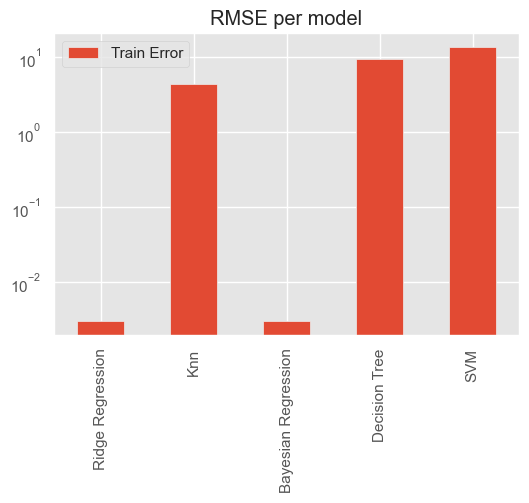

In [220]:
df_rmse.plot(kind='bar', logy=True, title= "RMSE per model")